<a href="https://colab.research.google.com/github/aysualkaya/data/blob/main/mis331_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
data = pd.read_csv('sample_data/salesFact.csv')

In [ ]:
#frequency distributions
data['yearly_income'].value_counts()

$30K - $50K      3327
$10K - $30K      2222
$50K - $70K      1845
$70K - $90K      1207
$130K - $150K     506
$110K - $130K     493
$90K - $110K      458
$150K +           223
Name: yearly_income, dtype: int64

In [ ]:
data['gender'].value_counts()

M    5184
F    5097
Name: gender, dtype: int64

In [ ]:
data['marital_status'].value_counts()

M    5142
S    5139
Name: marital_status, dtype: int64

In [ ]:
data['total_children'].value_counts()

2    2068
4    2063
3    2059
1    2025
0    1038
5    1028
Name: total_children, dtype: int64

In [ ]:
data['education'].value_counts()

Partial High School    3094
High School Degree     3039
Bachelors Degree       2619
Partial College         990
Graduate Degree         539
Name: education, dtype: int64

In [ ]:
data['member_card'].value_counts()

Bronze    5703
Normal    2420
Golden    1198
Silver     960
Name: member_card, dtype: int64

In [ ]:
pd.crosstab(data['member_card'], data['education'], rownames=['member_card'], colnames=['education'])

education,Bachelors Degree,Graduate Degree,High School Degree,Partial College,Partial High School
member_card,,,,,
Bronze,1821,371,2072,686,753
Golden,358,67,439,135,199
Normal,153,37,216,58,1956
Silver,287,64,312,111,186


In [3]:
data['AverageTotal'] = data['TotalDrinkSales'] + data['TotalFoodSales'] + data['TotalNonConSales']

# print(data['education'].value_counts())
# print(data['member_card'].value_counts())

print(data.columns)

data['AverageUnitTotal'] = data['TotalDrinkUnitSales'] + data['TotalFoodUnitSales'] + data['TotalNonConUnitSales']
print(data.columns)

Index(['TotalDrinkUnitSales', 'TotalDrinkSales', 'TotalFoodSales',
       'TotalFoodUnitSales', 'TotalNonConUnitSales', 'TotalNonConSales',
       'customer_id', 'marital_status', 'yearly_income', 'gender',
       'total_children', 'num_children_at_home', 'education', 'member_card',
       'occupation', 'houseowner', 'num_cars_owned', 'AverageTotal'],
      dtype='object')
Index(['TotalDrinkUnitSales', 'TotalDrinkSales', 'TotalFoodSales',
       'TotalFoodUnitSales', 'TotalNonConUnitSales', 'TotalNonConSales',
       'customer_id', 'marital_status', 'yearly_income', 'gender',
       'total_children', 'num_children_at_home', 'education', 'member_card',
       'occupation', 'houseowner', 'num_cars_owned', 'AverageTotal',
       'AverageUnitTotal'],
      dtype='object')


In [ ]:
data.groupby(['education', 'member_card']).mean()['AverageTotal']

<ipython-input-10-f73c89e5faf9>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data.groupby(['education', 'member_card']).mean()['AverageTotal']


education            member_card
Bachelors Degree     Bronze         162.739599
                     Golden         168.180894
                     Normal         136.236405
                     Silver         155.602056
Graduate Degree      Bronze         163.267655
                     Golden         166.199851
                     Normal         135.011081
                     Silver         155.025937
High School Degree   Bronze         156.358393
                     Golden         191.578018
                     Normal         173.221389
                     Silver         125.205513
Partial College      Bronze         157.409359
                     Golden         152.766074
                     Normal         121.830345
                     Silver         156.151892
Partial High School  Bronze         173.159309
                     Golden         165.115779
                     Normal         158.028538
                     Silver         138.644892
Name: AverageTotal, dtype: 

In [ ]:
data.groupby(['gender']).mean()['TotalDrinkSales']

<ipython-input-11-455105df5683>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data.groupby(['gender']).mean()['TotalDrinkSales']


gender
F    14.249757
M    13.492932
Name: TotalDrinkSales, dtype: float64

In [ ]:
data.groupby(['marital_status']).mean()['TotalDrinkSales']

<ipython-input-12-3abf975980c3>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data.groupby(['marital_status']).mean()['TotalDrinkSales']


marital_status
M    13.925836
S    13.810414
Name: TotalDrinkSales, dtype: float64

In [ ]:
data.groupby(['gender']).mean()['TotalFoodSales']

<ipython-input-13-cbcdfbf38f7f>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data.groupby(['gender']).mean()['TotalFoodSales']


gender
F    117.686531
M    113.295359
Name: TotalFoodSales, dtype: float64

In [ ]:
data.groupby(['marital_status']).mean()['TotalFoodSales']

<ipython-input-14-93e3f417f346>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data.groupby(['marital_status']).mean()['TotalFoodSales']


marital_status
M    114.306077
S    116.639335
Name: TotalFoodSales, dtype: float64

In [ ]:
data.groupby(['yearly_income']).mean()['AverageTotal']

<ipython-input-15-69de2c23bb70>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data.groupby(['yearly_income']).mean()['AverageTotal']


yearly_income
$10K - $30K      159.843555
$110K - $130K    149.000568
$130K - $150K    179.837273
$150K +          144.385381
$30K - $50K      162.269369
$50K - $70K      150.732927
$70K - $90K      167.776935
$90K - $110K     157.382402
Name: AverageTotal, dtype: float64

In [ ]:
data[['AverageTotal', 'TotalFoodSales']].corr()

,AverageTotal,TotalFoodSales
AverageTotal,1.000000,0.994313
TotalFoodSales,0.994313,1.000000


In [ ]:
data.groupby(['yearly_income', 'education']).mean()['AverageTotal']

<ipython-input-17-887262ee407d>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data.groupby(['yearly_income', 'education']).mean()['AverageTotal']


yearly_income  education          
$10K - $30K    Bachelors Degree       139.122167
               Graduate Degree        194.625714
               High School Degree     174.420641
               Partial College         88.718667
               Partial High School    160.294413
$110K - $130K  Bachelors Degree       185.485619
               Graduate Degree        129.643333
               High School Degree     139.623648
               Partial College        164.380909
               Partial High School    138.326514
$130K - $150K  Bachelors Degree       170.856526
               Graduate Degree        177.664659
               High School Degree     183.491916
               Partial College        187.327907
               Partial High School    180.827876
$150K +        Bachelors Degree       156.052830
               Graduate Degree        210.133333
               High School Degree     135.773059
               Partial College        119.023529
               Partial High School

In [ ]:
data.groupby(['yearly_income', 'member_card']).mean()['AverageTotal']

<ipython-input-18-f5f992eaede8>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data.groupby(['yearly_income', 'member_card']).mean()['AverageTotal']


yearly_income  member_card
$10K - $30K    Bronze         195.970000
               Golden         197.208605
               Normal         158.066415
               Silver         147.062857
$110K - $130K  Bronze         137.235796
               Golden         187.215000
               Normal         178.090435
               Silver         155.678889
$130K - $150K  Bronze         177.384394
               Golden         180.830870
               Normal         204.547308
               Silver         182.690000
$150K +        Bronze         117.732727
               Golden         159.569029
               Normal          55.980000
               Silver         134.161776
$30K - $50K    Bronze         164.484923
               Golden         181.321029
               Normal         143.634897
               Silver         128.284817
$50K - $70K    Bronze         151.024906
               Golden         153.705455
               Normal         142.770375
               Silver         

In [ ]:
data.groupby(['yearly_income', 'gender']).mean()['AverageTotal']

<ipython-input-19-eb5b39d84e13>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data.groupby(['yearly_income', 'gender']).mean()['AverageTotal']


yearly_income  gender
$10K - $30K    F         159.740649
               M         159.946092
$110K - $130K  F         145.167119
               M         152.726680
$130K - $150K  F         173.653543
               M         186.070079
$150K +        F         158.847308
               M         131.746387
$30K - $50K    F         160.050916
               M         164.390006
$50K - $70K    F         163.457976
               M         138.508225
$70K - $90K    F         182.567638
               M         152.257997
$90K - $110K   F         149.876402
               M         165.573881
Name: AverageTotal, dtype: float64

In [ ]:
data.groupby(['houseowner', 'education']).mean()['AverageTotal']

<ipython-input-20-041ccd4a01d3>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data.groupby(['houseowner', 'education']).mean()['AverageTotal']


houseowner  education          
N           Bachelors Degree       155.696322
            Graduate Degree        154.953275
            High School Degree     163.616636
            Partial College        149.721878
            Partial High School    160.440691
Y           Bachelors Degree       165.129234
            Graduate Degree        163.390625
            High School Degree     156.799166
            Partial College        157.743020
            Partial High School    161.379183
Name: AverageTotal, dtype: float64

In [ ]:
#Contingency Tables
table_gender = pd.crosstab(data['member_card'], data['gender'])
print("Contingency Table for MemberCard Types vs Gender: ")
print(table_gender)


Contingency Table for MemberCard Types vs Gender: 
gender          F     M
member_card            
Bronze       2830  2873
Golden        587   611
Normal       1203  1217
Silver        477   483


In [ ]:
table_marital_status = pd.crosstab(data['member_card'], data['marital_status'])
print("Contingency Table for MemberCard Types vs Marital Status: ")
print(table_marital_status)

Contingency Table for MemberCard Types vs Marital Status: 
marital_status     M     S
member_card               
Bronze          2486  3217
Golden           993   205
Normal          1189  1231
Silver           474   486


In [ ]:
table_income_level = pd.crosstab(data['member_card'], data['yearly_income'])
print("Contingency Table for MemberCard Types vs Income Level: ")
print(table_income_level)

Contingency Table for MemberCard Types vs Income Level: 
yearly_income  $10K - $30K  $110K - $130K  $130K - $150K  $150K +  \
member_card                                                         
Bronze                  74            333            355       11   
Golden                  43             74             69      103   
Normal                2056             23             26        2   
Silver                  49             63             56      107   

yearly_income  $30K - $50K  $50K - $70K  $70K - $90K  $90K - $110K  
member_card                                                         
Bronze                2407         1331          858           334  
Golden                 447          242          168            52  
Normal                 145           80           64            24  
Silver                 328          192          117            48  


array([[<Axes: title={'center': 'TotalFoodSales'}, xlabel='[gender]'>,
        <Axes: title={'center': 'TotalDrinkSales'}, xlabel='[gender]'>],
       [<Axes: title={'center': 'TotalNonConSales'}, xlabel='[gender]'>,
        <Axes: >]], dtype=object)

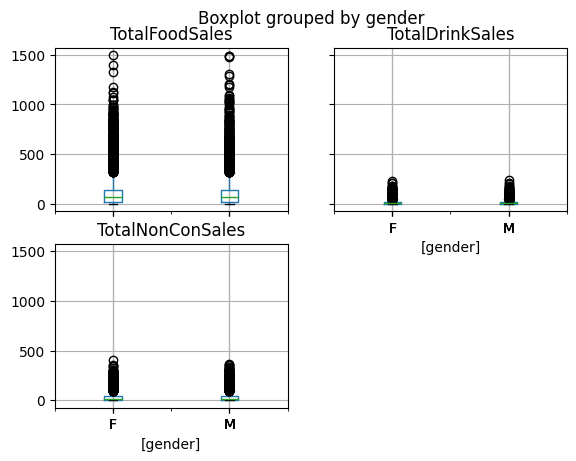

In [ ]:
data.boxplot(column=['TotalFoodSales', 'TotalDrinkSales', 'TotalNonConSales'], by=['gender'])


array([[<Axes: title={'center': 'TotalFoodSales'}, xlabel='[member_card]'>,
        <Axes: title={'center': 'TotalDrinkSales'}, xlabel='[member_card]'>],
       [<Axes: title={'center': 'TotalNonConSales'}, xlabel='[member_card]'>,
        <Axes: >]], dtype=object)

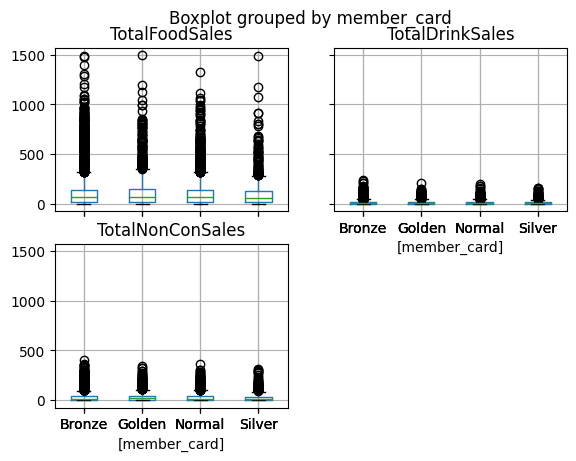

In [ ]:
data.boxplot(column=['TotalFoodSales', 'TotalDrinkSales', 'TotalNonConSales'], by=['member_card'])

array([[<Axes: title={'center': 'TotalFoodSales'}, xlabel='[education]'>,
        <Axes: title={'center': 'TotalDrinkSales'}, xlabel='[education]'>],
       [<Axes: title={'center': 'TotalNonConSales'}, xlabel='[education]'>,
        <Axes: >]], dtype=object)

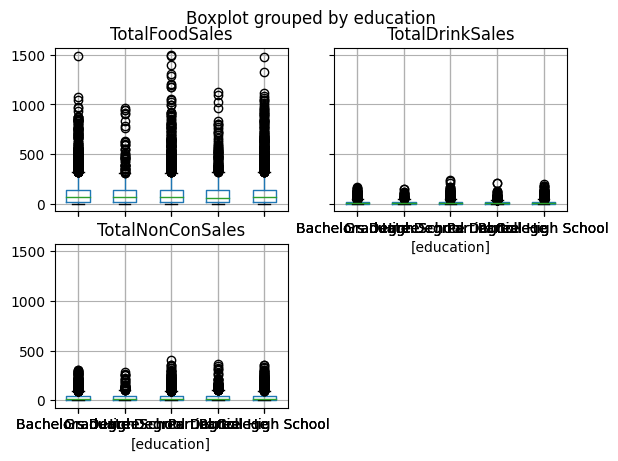

In [ ]:
data.boxplot(column=['TotalFoodSales', 'TotalDrinkSales', 'TotalNonConSales'], by=['education'])

array([[<Axes: title={'center': 'TotalFoodSales'}, xlabel='[yearly_income]'>,
        <Axes: title={'center': 'TotalDrinkSales'}, xlabel='[yearly_income]'>],
       [<Axes: title={'center': 'TotalNonConSales'}, xlabel='[yearly_income]'>,
        <Axes: >]], dtype=object)

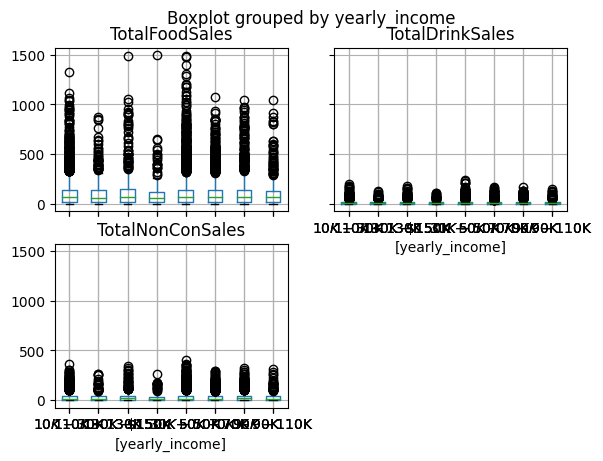

In [ ]:
data.boxplot(column=['TotalFoodSales', 'TotalDrinkSales', 'TotalNonConSales'], by=['yearly_income'])

array([[<Axes: title={'center': 'TotalFoodSales'}, xlabel='[occupation]'>,
        <Axes: title={'center': 'TotalDrinkSales'}, xlabel='[occupation]'>],
       [<Axes: title={'center': 'TotalNonConSales'}, xlabel='[occupation]'>,
        <Axes: >]], dtype=object)

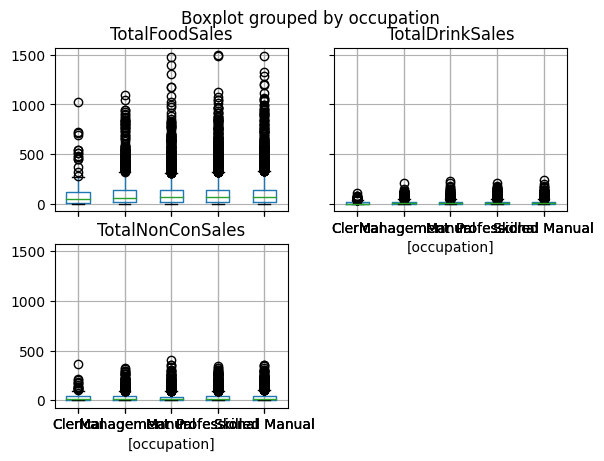

In [ ]:
data.boxplot(column=['TotalFoodSales', 'TotalDrinkSales', 'TotalNonConSales'], by=['occupation'])

array([[<Axes: title={'center': 'TotalFoodSales'}, xlabel='[houseowner]'>,
        <Axes: title={'center': 'TotalDrinkSales'}, xlabel='[houseowner]'>],
       [<Axes: title={'center': 'TotalNonConSales'}, xlabel='[houseowner]'>,
        <Axes: >]], dtype=object)

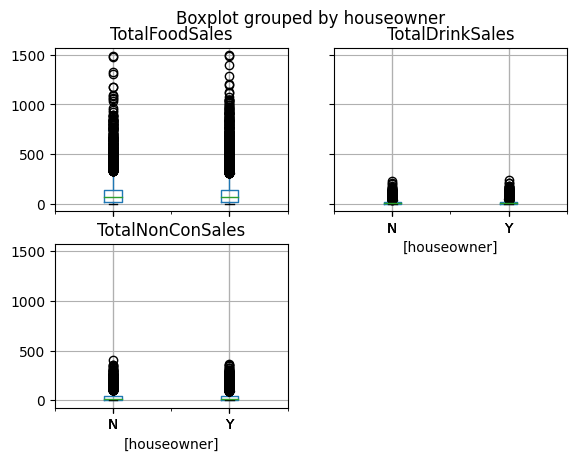

In [ ]:
data.boxplot(column=['TotalFoodSales', 'TotalDrinkSales', 'TotalNonConSales'], by=['houseowner'])

<Axes: title={'center': 'AverageTotal'}, xlabel='[gender]'>

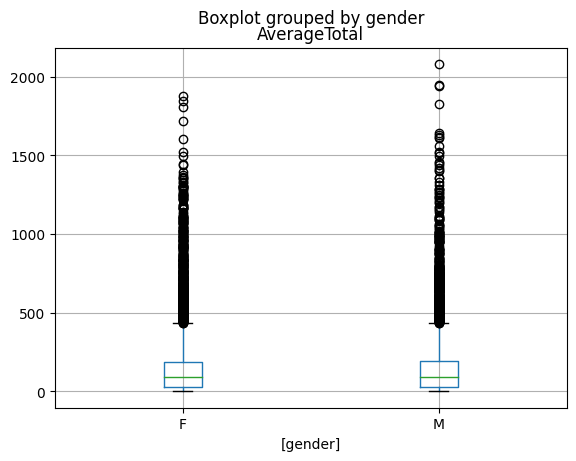

In [ ]:
data.boxplot(column=['AverageTotal'], by=['gender'])
#the table shows Male customers are more likely to buy foods, drinks, and non-consumables than female customers.
#However, there is no big difference among them.

<Axes: title={'center': 'AverageTotal'}, xlabel='[education]'>

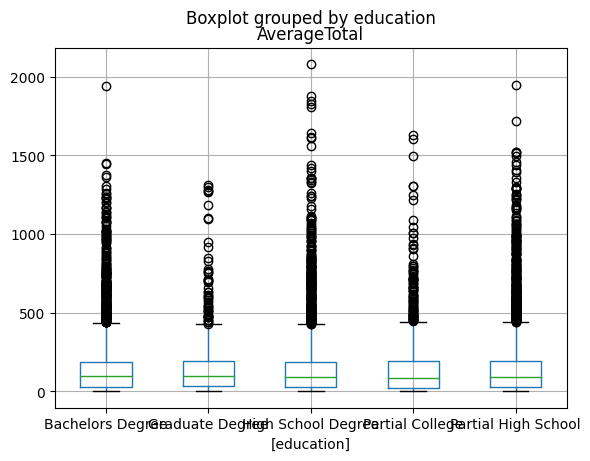

In [ ]:
data.boxplot(column=['AverageTotal'], by=['education'])
#the table shows customers who have graduate degree  are more likely to buy foods,drinks and non-consumables
# Additionally, customers with high school degree are more likely to consume all of them.

<Axes: title={'center': 'AverageTotal'}, xlabel='[occupation]'>

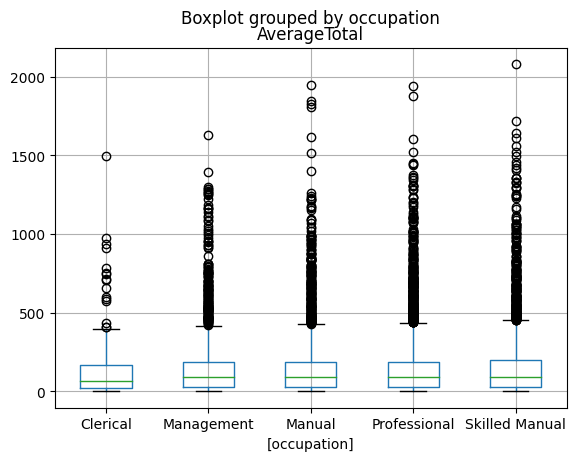

In [ ]:
data.boxplot(column=['AverageTotal'], by=['occupation'])

In [ ]:
###Principal Component Analysis (PCA) is a dimensionality reduction technique commonly used in machine learning and data analysis
# z-standardization is critical when one variable has a much larger scale or variance than the others
# and you want to prevent it from dominating the PCA, standardization can be beneficial.
data['zAverageTotal'] = (data['AverageTotal'] - data['AverageTotal'].mean()) / data['AverageTotal'].std()
data.columns
data['zAverageTotal'].mean()
data['zAverageTotal'].std()
print(data[['AverageTotal','zAverageTotal']])
print(data['AverageTotal'].mean())
print(data['AverageTotal'].std())

       AverageTotal  zAverageTotal
0              0.00      -0.731996
1              0.00      -0.731996
2            203.17       0.197826
3              0.00      -0.731996
4              1.08      -0.727053
...             ...            ...
10276        230.34       0.322172
10277        167.24       0.033390
10278          0.00      -0.731996
10279        232.77       0.333293
10280        246.90       0.397960

[10281 rows x 2 columns]
159.9441299484486
218.5041280759024


In [ ]:
#PCA ANALYSIS
print(data.columns)
features = data[['TotalDrinkSales', 'TotalFoodSales', 'TotalNonConSales']]

print(features.columns)



Index(['TotalDrinkUnitSales', 'TotalDrinkSales', 'TotalFoodSales',
       'TotalFoodUnitSales', 'TotalNonConUnitSales', 'TotalNonConSales',
       'customer_id', 'marital_status', 'yearly_income', 'gender',
       'total_children', 'num_children_at_home', 'education', 'member_card',
       'occupation', 'houseowner', 'num_cars_owned'],
      dtype='object')
Index(['TotalDrinkSales', 'TotalFoodSales', 'TotalNonConSales'], dtype='object')


In [ ]:
# TotalFoodSales has a dominance effect unless we normalize the data. We may also normalise to free the data of units.
# Initiate StandardScaler object and transform the features into scaled values in an array form
zAverageTotal = StandardScaler().fit_transform(features)

print(f"Mean is: {zAverageTotal.mean()}")
print(f"Standard Deviation is: {zAverageTotal.std()}")

print(zAverageTotal)
print(type(zAverageTotal))

z_dataframe = pd. DataFrame(zAverageTotal, columns = ['z_Drink', 'z_Food', 'z_NonCon'])
print(z_dataframe)
# See that the correlation does not change when normalization is applied
print(features.corr())
print(z_dataframe.corr())

Mean is: -4.791780599750376e-17
Standard Deviation is: 1.0
[[-0.64233006 -0.72704594 -0.69111991]
 [-0.64233006 -0.72704594 -0.69111991]
 [ 0.06817196  0.05375531  0.75012362]
 ...
 [-0.64233006 -0.72704594 -0.69111991]
 [-0.04391506  0.31171376  0.54800627]
 [ 2.26174275  0.21084741  0.10470306]]
<class 'numpy.ndarray'>
        z_Drink    z_Food  z_NonCon
0     -0.642330 -0.727046 -0.691120
1     -0.642330 -0.727046 -0.691120
2      0.068172  0.053755  0.750124
3     -0.642330 -0.727046 -0.691120
4     -0.642330 -0.720246 -0.691120
...         ...       ...       ...
10276  1.057502 -0.215977  1.848784
10277 -0.365355 -0.021296  0.419283
10278 -0.642330 -0.727046 -0.691120
10279 -0.043915  0.311714  0.548006
10280  2.261743  0.210847  0.104703

[10281 rows x 3 columns]
                  TotalDrinkSales  TotalFoodSales  TotalNonConSales
TotalDrinkSales          1.000000        0.841790          0.799221
TotalFoodSales           0.841790        1.000000          0.909016
TotalNonConSale

In [ ]:
# Initiate the model, PCA object
pca = PCA(n_components=3)

z_pca = pca.fit_transform(zAverageTotal)
z_pca

print(f'Proportion of Variance: {pca.explained_variance_ratio_}')
print(f'Explained Variance: {pca.explained_variance_}')
z_pca
z_pca_dataframe = pd.DataFrame(z_pca, columns=['PC1', 'PC2', 'PC3'])
z_pca_dataframe.corr()
corr_data = pd.concat([z_dataframe, z_pca_dataframe], axis=1)
corr_data.shape
corr_data.corr()


Proportion of Variance: [0.90027564 0.07111569 0.02860868]
Explained Variance: [2.70108964 0.21336781 0.08583438]


,z_Drink,z_Food,z_NonCon,PC1,PC2,PC3
z_Drink,1.000000,0.841790,0.799221,9.262978e-01,3.735664e-01,-4.919840e-02
z_Food,0.841790,1.000000,0.909016,9.674204e-01,-1.157814e-01,2.251499e-01
z_NonCon,0.799221,0.909016,1.000000,9.523114e-01,-2.457436e-01,-1.808675e-01
PC1,0.926298,0.967420,0.952311,1.000000e+00,-6.782962e-17,-1.145019e-17
PC2,0.373566,-0.115781,-0.245744,-6.782962e-17,1.000000e+00,1.798372e-16
PC3,-0.049198,0.225150,-0.180868,-1.145019e-17,1.798372e-16,1.000000e+00


In [6]:
#PCA ANALYSIS FOR UNITS
print(data.columns)
Unitfeatures = data[['TotalDrinkUnitSales', 'TotalFoodUnitSales', 'TotalNonConUnitSales']]

print(features.columns)


Index(['TotalDrinkUnitSales', 'TotalDrinkSales', 'TotalFoodSales',
       'TotalFoodUnitSales', 'TotalNonConUnitSales', 'TotalNonConSales',
       'customer_id', 'marital_status', 'yearly_income', 'gender',
       'total_children', 'num_children_at_home', 'education', 'member_card',
       'occupation', 'houseowner', 'num_cars_owned', 'AverageTotal',
       'AverageUnitTotal'],
      dtype='object')
Index(['TotalDrinkUnitSales', 'TotalFoodUnitSales', 'TotalNonConUnitSales'], dtype='object')


In [7]:
zAverageUnitTotal = StandardScaler().fit_transform(Unitfeatures)

print(f"Mean is: {zAverageUnitTotal.mean()}")
print(f"Standard Deviation is: {zAverageUnitTotal.std()}")

print(zAverageUnitTotal)
print(type(zAverageUnitTotal))

z_dataframe = pd. DataFrame(zAverageUnitTotal, columns = ['z_DrinkUnit', 'z_FoodUnit', 'z_NonConUnit'])
print(z_dataframe)
# See that the correlation does not change when normalization is applied
print(Unitfeatures.corr())
print(z_dataframe.corr())

Mean is: -1.7508429114472525e-17
Standard Deviation is: 1.0
[[-0.65515733 -0.72797435 -0.69789691]
 [-0.65515733 -0.72797435 -0.69789691]
 [ 0.00380911 -0.01692499  0.71427082]
 ...
 [-0.65515733 -0.72797435 -0.69789691]
 [ 0.00380911  0.38555577  0.37340275]
 [ 1.60415617  0.00990706 -0.01616077]]
<class 'numpy.ndarray'>
       z_DrinkUnit  z_FoodUnit  z_NonConUnit
0        -0.655157   -0.727974     -0.697897
1        -0.655157   -0.727974     -0.697897
2         0.003809   -0.016925      0.714271
3        -0.655157   -0.727974     -0.697897
4        -0.655157   -0.701142     -0.697897
...            ...         ...           ...
10276     0.286223   -0.097421      1.298616
10277    -0.278605   -0.043757      0.519489
10278    -0.655157   -0.727974     -0.697897
10279     0.003809    0.385556      0.373403
10280     1.604156    0.009907     -0.016161

[10281 rows x 3 columns]
                      TotalDrinkUnitSales  TotalFoodUnitSales  \
TotalDrinkUnitSales              1.000000    

In [9]:
# Initiate the model, PCA object
pcaUnit = PCA(n_components=3)

z_pcaUnit = pcaUnit.fit_transform(zAverageUnitTotal)
z_pcaUnit

print(f'Proportion of Variance: {pcaUnit.explained_variance_ratio_}')
print(f'Explained Variance: {pcaUnit.explained_variance_}')
z_pcaUnit
z_pcaUnit_dataframe = pd.DataFrame(z_pcaUnit, columns=['PCU1', 'PCU2', 'PCU3'])
z_pcaUnit_dataframe.corr()
corr_data = pd.concat([z_dataframe, z_pcaUnit_dataframe], axis=1)
corr_data.shape
corr_data.corr()


Proportion of Variance: [0.91426938 0.06116387 0.02456675]
Explained Variance: [2.74307496 0.18350945 0.07370742]


,z_DrinkUnit,z_FoodUnit,z_NonConUnit,PCU1,PCU2,PCU3
z_DrinkUnit,1.000000,0.866710,0.825863,9.376306e-01,3.439170e-01,-5.069385e-02
z_FoodUnit,0.866710,1.000000,0.920768,9.724753e-01,-1.001631e-01,2.103784e-01
z_NonConUnit,0.825863,0.920768,1.000000,9.580964e-01,-2.349043e-01,-1.639247e-01
PCU1,0.937631,0.972475,0.958096,1.000000e+00,2.893684e-16,6.965313e-19
PCU2,0.343917,-0.100163,-0.234904,2.893684e-16,1.000000e+00,-3.914081e-17
PCU3,-0.050694,0.210378,-0.163925,6.965313e-19,-3.914081e-17,1.000000e+00


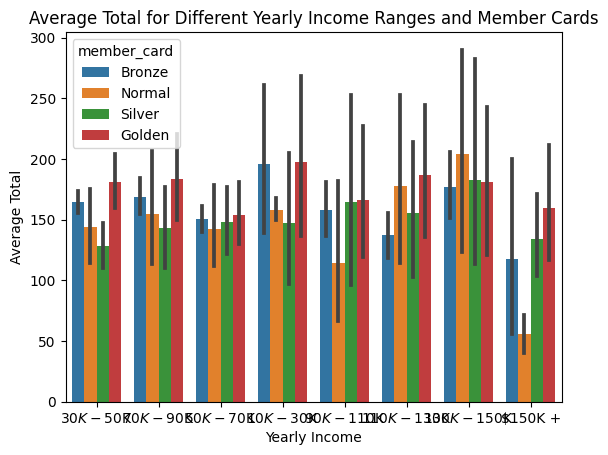

In [ ]:
data = pd.read_csv('sample_data/salesFact.csv')
data['AverageTotal'] = data['TotalDrinkSales'] + data['TotalFoodSales'] + data['TotalNonConSales']
sns.barplot(x='yearly_income', y='AverageTotal',hue='member_card', data=data)
plt.title('Average Total for Different Yearly Income Ranges and Member Cards')
plt.xlabel('Yearly Income')
plt.ylabel('Average Total')
plt.show()

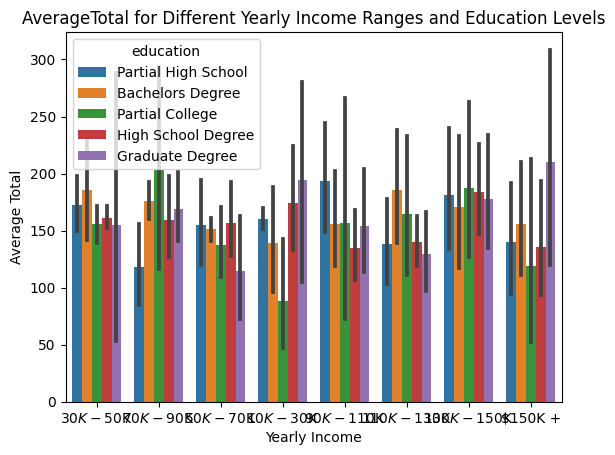

In [ ]:
data = pd.read_csv('sample_data/salesFact.csv')
data['AverageTotal'] = data['TotalDrinkSales'] + data['TotalFoodSales'] + data['TotalNonConSales']
sns.barplot(x='yearly_income', y='AverageTotal', hue='education',data=data)
plt.title('AverageTotal for Different Yearly Income Ranges and Education Levels')
plt.xlabel('Yearly Income')
plt.ylabel('Average Total')
plt.show()


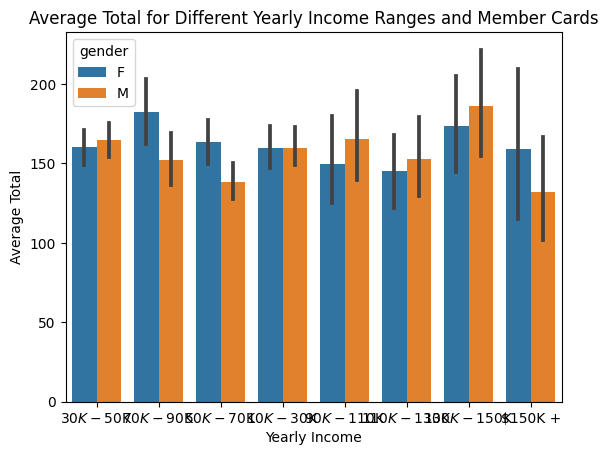

In [ ]:
data = pd.read_csv('sample_data/salesFact.csv')
data['AverageTotal'] = data['TotalDrinkSales'] + data['TotalFoodSales'] + data['TotalNonConSales']
sns.barplot(x='yearly_income', y='AverageTotal',hue='gender', data=data)
plt.title('Average Total for Different Yearly Income Ranges and Member Cards')
plt.xlabel('Yearly Income')
plt.ylabel('Average Total')
plt.show()

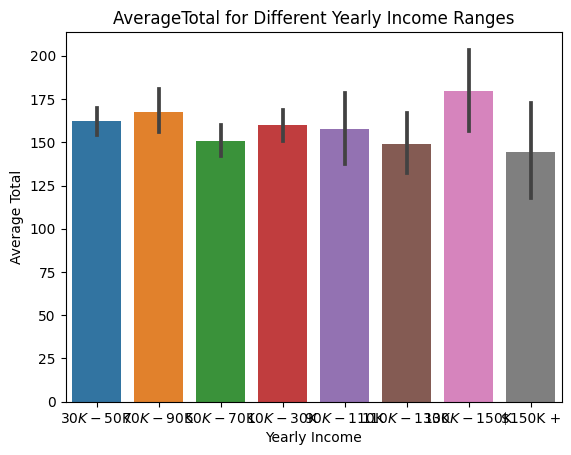

In [ ]:
data = pd.read_csv('sample_data/salesFact.csv')
data['AverageTotal'] = data['TotalDrinkSales'] + data['TotalFoodSales'] + data['TotalNonConSales']
sns.barplot(x='yearly_income', y='AverageTotal',data=data)
plt.title('AverageTotal for Different Yearly Income Ranges')
plt.xlabel('Yearly Income')
plt.ylabel('Average Total')
plt.show()